# Large Sphere 

Shortest pairwise distance: 1.000000


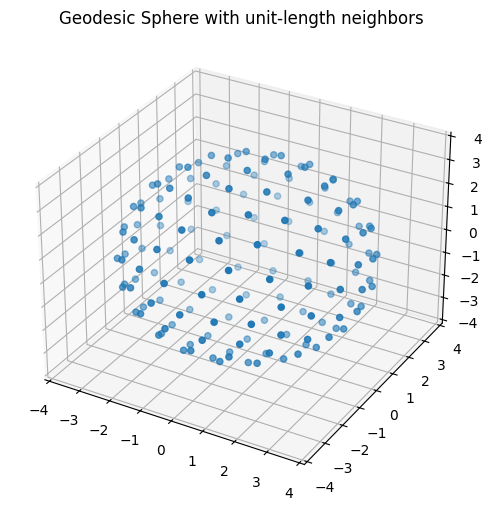

In [12]:
import numpy as np
from scipy.spatial import distance_matrix
from itertools import combinations
import Qchains
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def normalize_rows(vectors):
    return vectors / np.linalg.norm(vectors, axis=1)[:, np.newaxis]

def create_geodesic_sphere(subdivisions=2):
    

    # Start with 12 vertices of an icosahedron
    phi = (1 + np.sqrt(5)) / 2  # golden ratio
    verts = np.array([
        [-1,  phi,  0], [1,  phi,  0], [-1, -phi,  0], [1, -phi,  0],
        [0, -1,  phi], [0,  1,  phi], [0, -1, -phi], [0,  1, -phi],
        [phi,  0, -1], [phi,  0,  1], [-phi, 0, -1], [-phi, 0,  1]
    ])
    verts = normalize_rows(verts)

    # Get the convex hull faces (triangles)
    hull = ConvexHull(verts)
    triangles = hull.simplices

    # Subdivide triangles
    def midpoint(a, b):
        return normalize_rows([(a + b) / 2])[0]

    new_points = set(tuple(v) for v in verts)

    for _ in range(subdivisions):
        next_triangles = []
        new_pts = set()
        for tri in triangles:
            a, b, c = verts[tri]
            ab = tuple(midpoint(a, b))
            bc = tuple(midpoint(b, c))
            ca = tuple(midpoint(c, a))
            new_pts.update([ab, bc, ca])
        new_points.update(new_pts)
        verts = np.array(list(new_points))
        hull = ConvexHull(verts)
        triangles = hull.simplices

    # Rescale so nearest neighbor distance is 1
    D = distance_matrix(verts, verts)
    D[D == 0] = np.inf
    min_dist = np.min(D)
    verts /= min_dist

    return verts

# Create the sphere points
sphere_points = create_geodesic_sphere(subdivisions=2)

# Example: check the shortest distance
from scipy.spatial.distance import pdist
dists = pdist(sphere_points)
print(f"Shortest pairwise distance: {np.min(dists):.6f}")


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*sphere_points.T, s=20)
ax.set_title("Geodesic Sphere with unit-length neighbors")
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial import ConvexHull, distance_matrix
from scipy.spatial.distance import pdist

# Generate points
sphere_points = create_geodesic_sphere(subdivisions=2)

# Plot interactively using Plotly
x, y, z = sphere_points[:, 0], sphere_points[:, 1], sphere_points[:, 2]

fig = go.Figure(data=go.Scatter3d(
    x=x, y=y, z=z,
    mode='markers',
    marker=dict(size=3, color=z, colorscale='Viridis', opacity=0.8)
))

fig.update_layout(
    title='Interactive Geodesic Sphere',
    scene=dict(xaxis_title='X', yaxis_title='Y', zaxis_title='Z'),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig.show()

In [14]:
np.linalg.norm(np.array([ 0.        ,  0.        ,  3.62444272])- np.array([0.        ,  0.99043888,  3.48649048]))

0.9999999977683359

In [15]:
sphere_points.shape

(162, 3)

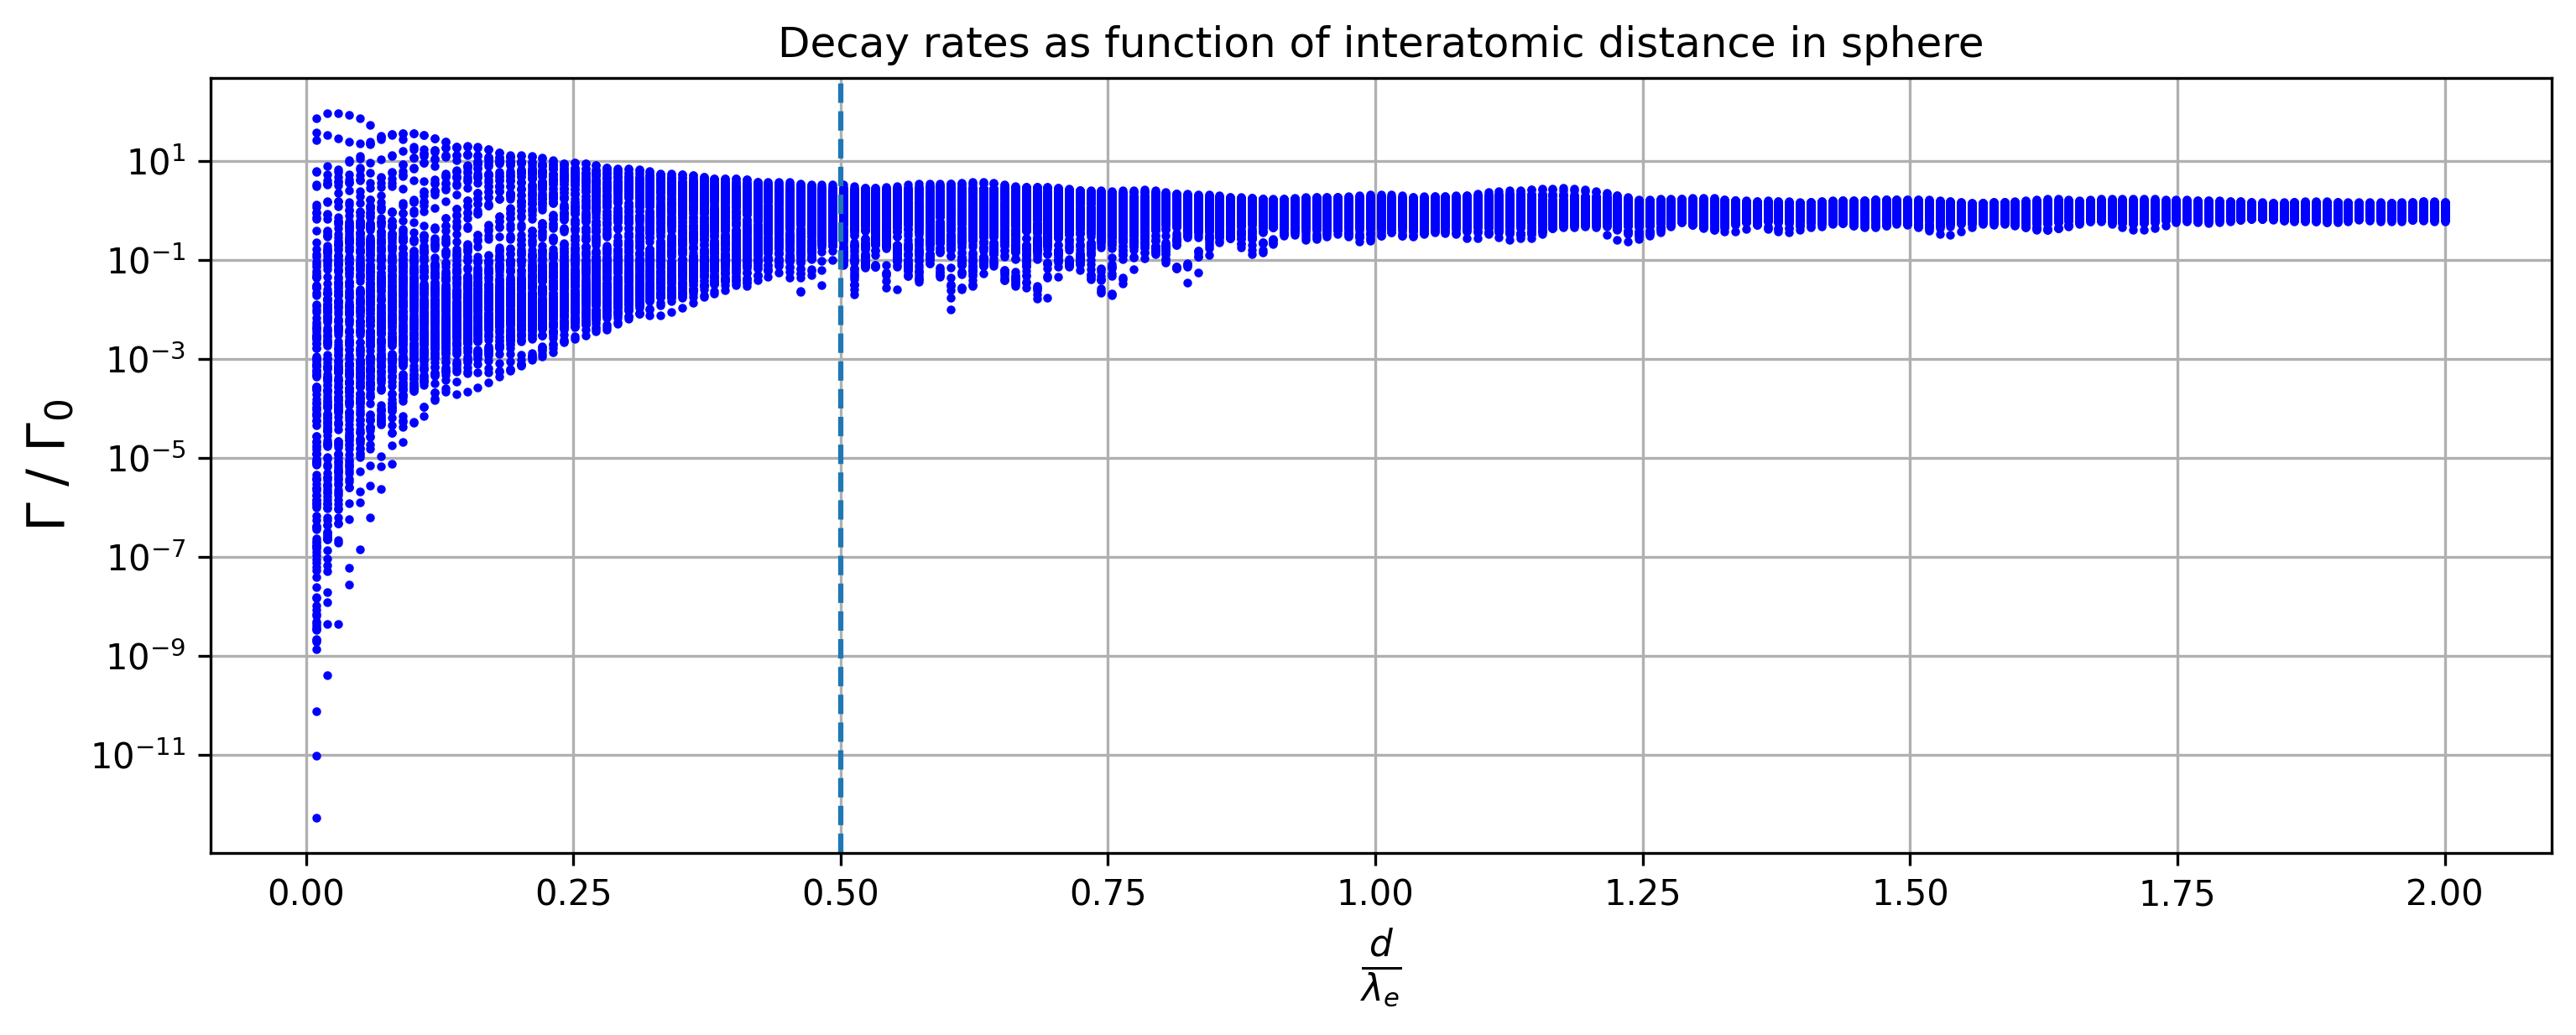

In [ ]:
dipole_hatvec = np.array([1, 0, 0])
decay_rate_list = []
most_subradiant_list = []
distances = np.linspace(0, 2, 200)

for d in distances[1:]:
    eigvals_sphere162 , eigvec_sphere162 = Qchains.FindEigenstates(sphere_points, dipole_hatvec, d)
    decay_rate = 2 * eigvals_sphere162.real
    decay_rate_list.append(decay_rate)

    subradiant = -np.max(2 * eigvals_sphere162.real)
    most_subradiant_list.append(subradiant)
    

decay_rate_list_reversed = [-p for p in decay_rate_list]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances[1:], decay_rate_list_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in sphere')
plt.yscale('log')
plt.grid()

Give hedgehog polarization

In [17]:
magnitudes_n = np.linalg.norm(sphere_points, axis=1, keepdims=True) 
unit_polarization = sphere_points / magnitudes_n

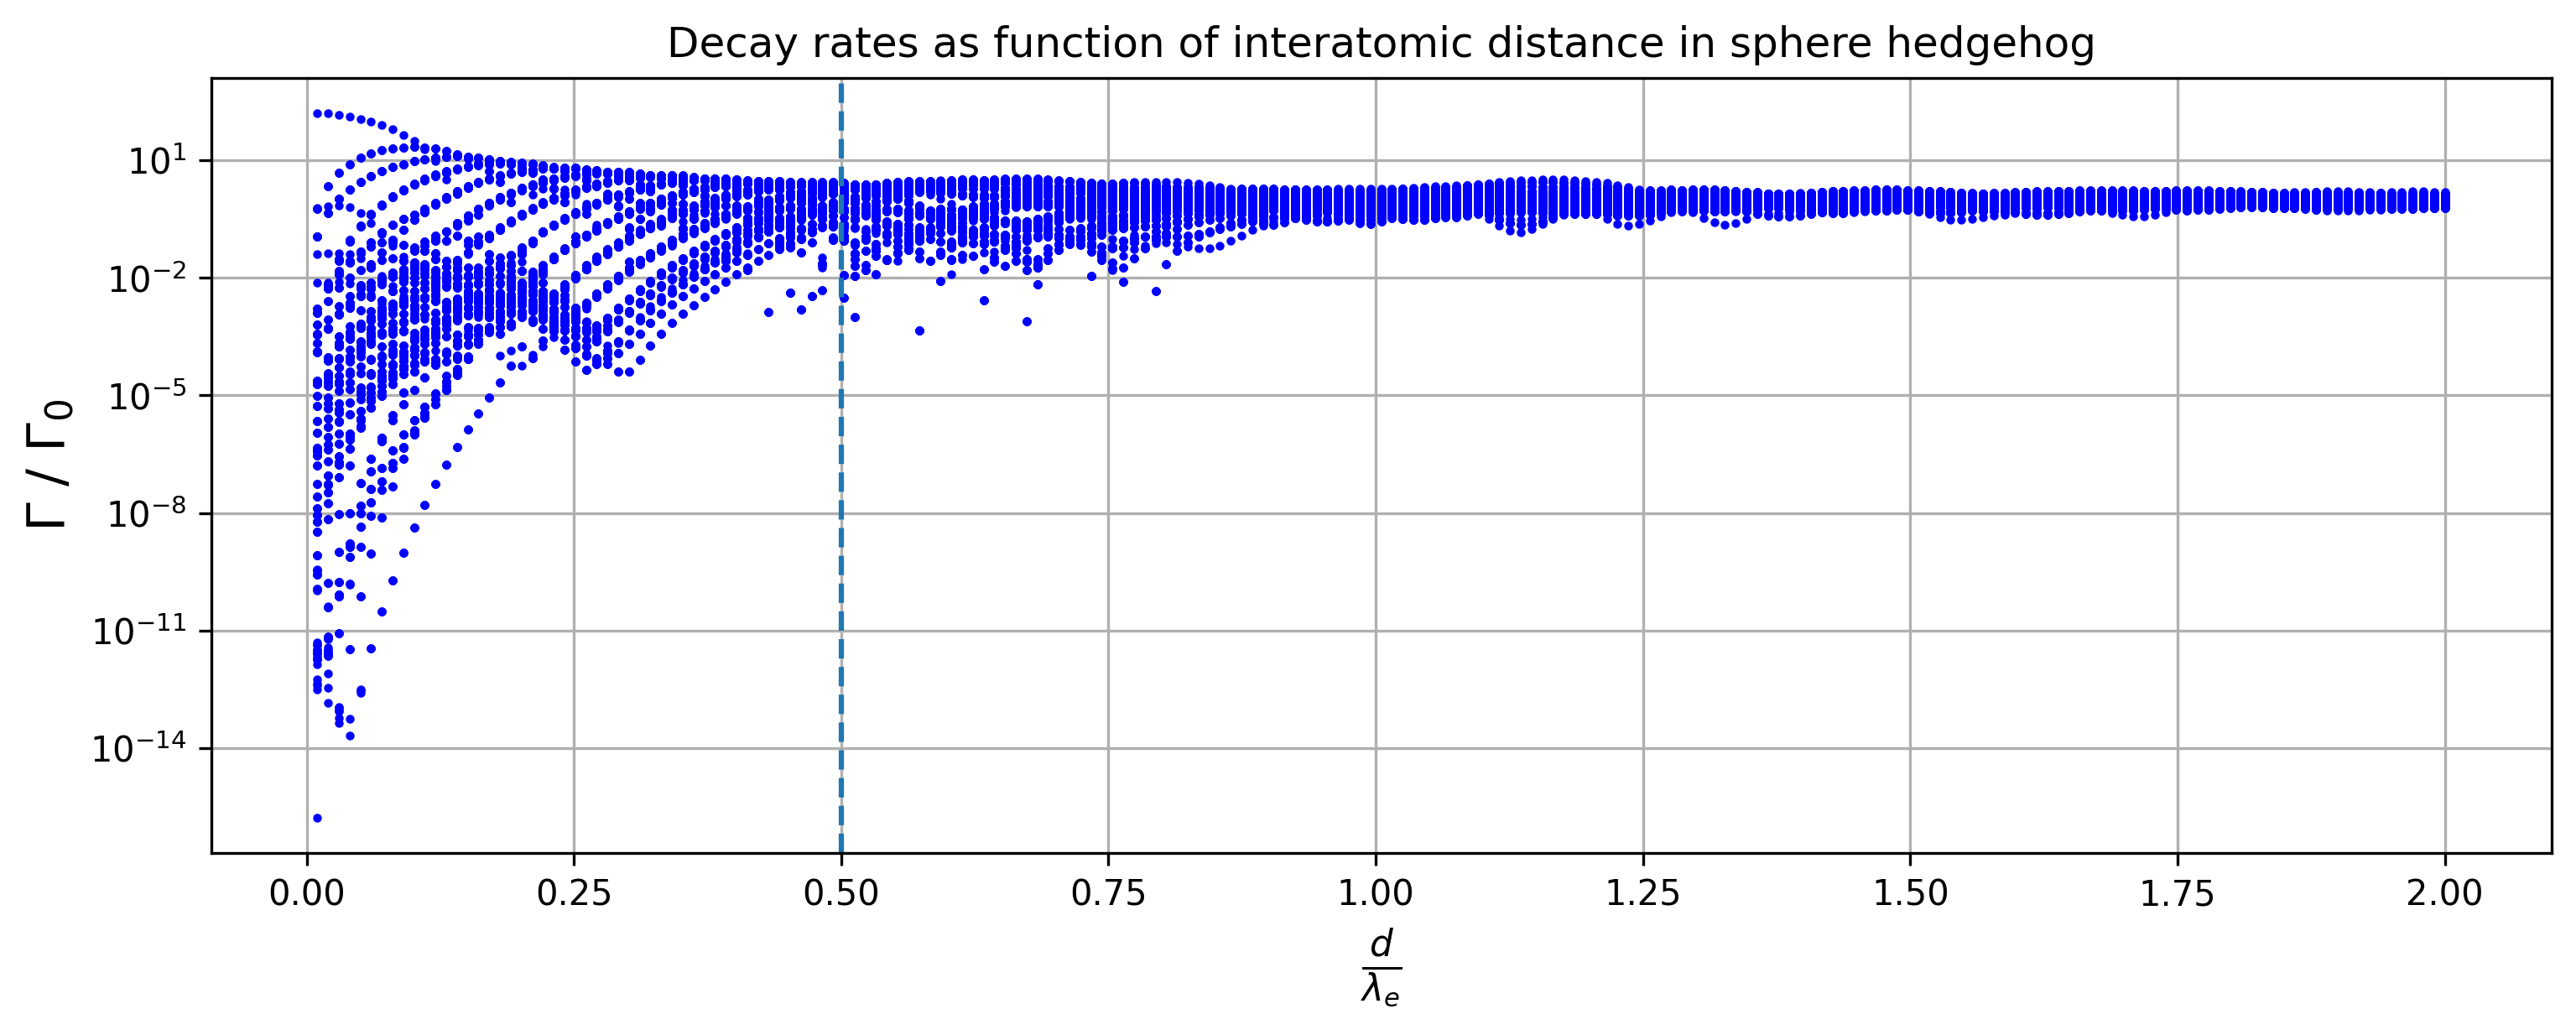

In [ ]:

decay_rate_list_hedge = []
most_subradiant_list_hedge = []
distances_hedge = np.linspace(0, 2, 200)

for d in distances_hedge[1:]:
    eigvals_sphere162_hedge , eigvec_sphere162_hedge = Qchains.EigenstatesHedgehog(sphere_points, unit_polarization, d)
    decay_rate_hedge = 2 * eigvals_sphere162_hedge.real
    decay_rate_list_hedge.append(decay_rate_hedge)

    subradiant_hedge = -np.max(2 * eigvals_sphere162_hedge.real)
    most_subradiant_list_hedge.append(subradiant_hedge)
    

decay_rate_list_hedge_reversed = [-p for p in decay_rate_list_hedge]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances_hedge[1:], decay_rate_list_hedge_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in sphere hedgehog')
plt.yscale('log')
plt.grid()

In [19]:
import plotly.graph_objects as go
import numpy as np

# Example shapes
# sphere_points: (N, 3)
# unit_polarization: (N, 3)

# Extract origin and vector components
x0, y0, z0 = sphere_points[:, 0], sphere_points[:, 1], sphere_points[:, 2]
u, v, w = unit_polarization[:, 0], unit_polarization[:, 1], unit_polarization[:, 2]

fig = go.Figure()

# Add 3D scatter of the sphere points
fig.add_trace(go.Scatter3d(
    x=x0, y=y0, z=z0,
    mode='markers',
    marker=dict(size=2, color='blue'),
    name='Sphere points'
))

# Add vector field as cones
fig.add_trace(go.Cone(
    x=x0, y=y0, z=z0,
    u=u, v=v, w=w,
    sizemode="absolute",
    sizeref=0.5,  # Adjust this to control arrow size
    anchor="tail",  # Origin of vector is at the point
    colorscale="Hot",
    showscale=False,
    name='Vectors',
    lighting=dict(ambient=1, diffuse=0, specular=0, roughness=0, fresnel=0)
))

fig.update_layout(
    scene=dict(
        xaxis_title='X', yaxis_title='Y', zaxis_title='Z',
        aspectmode='data'
    ),
    title='Vector Field on Sphere'
)

fig.show()


Sphere with central point

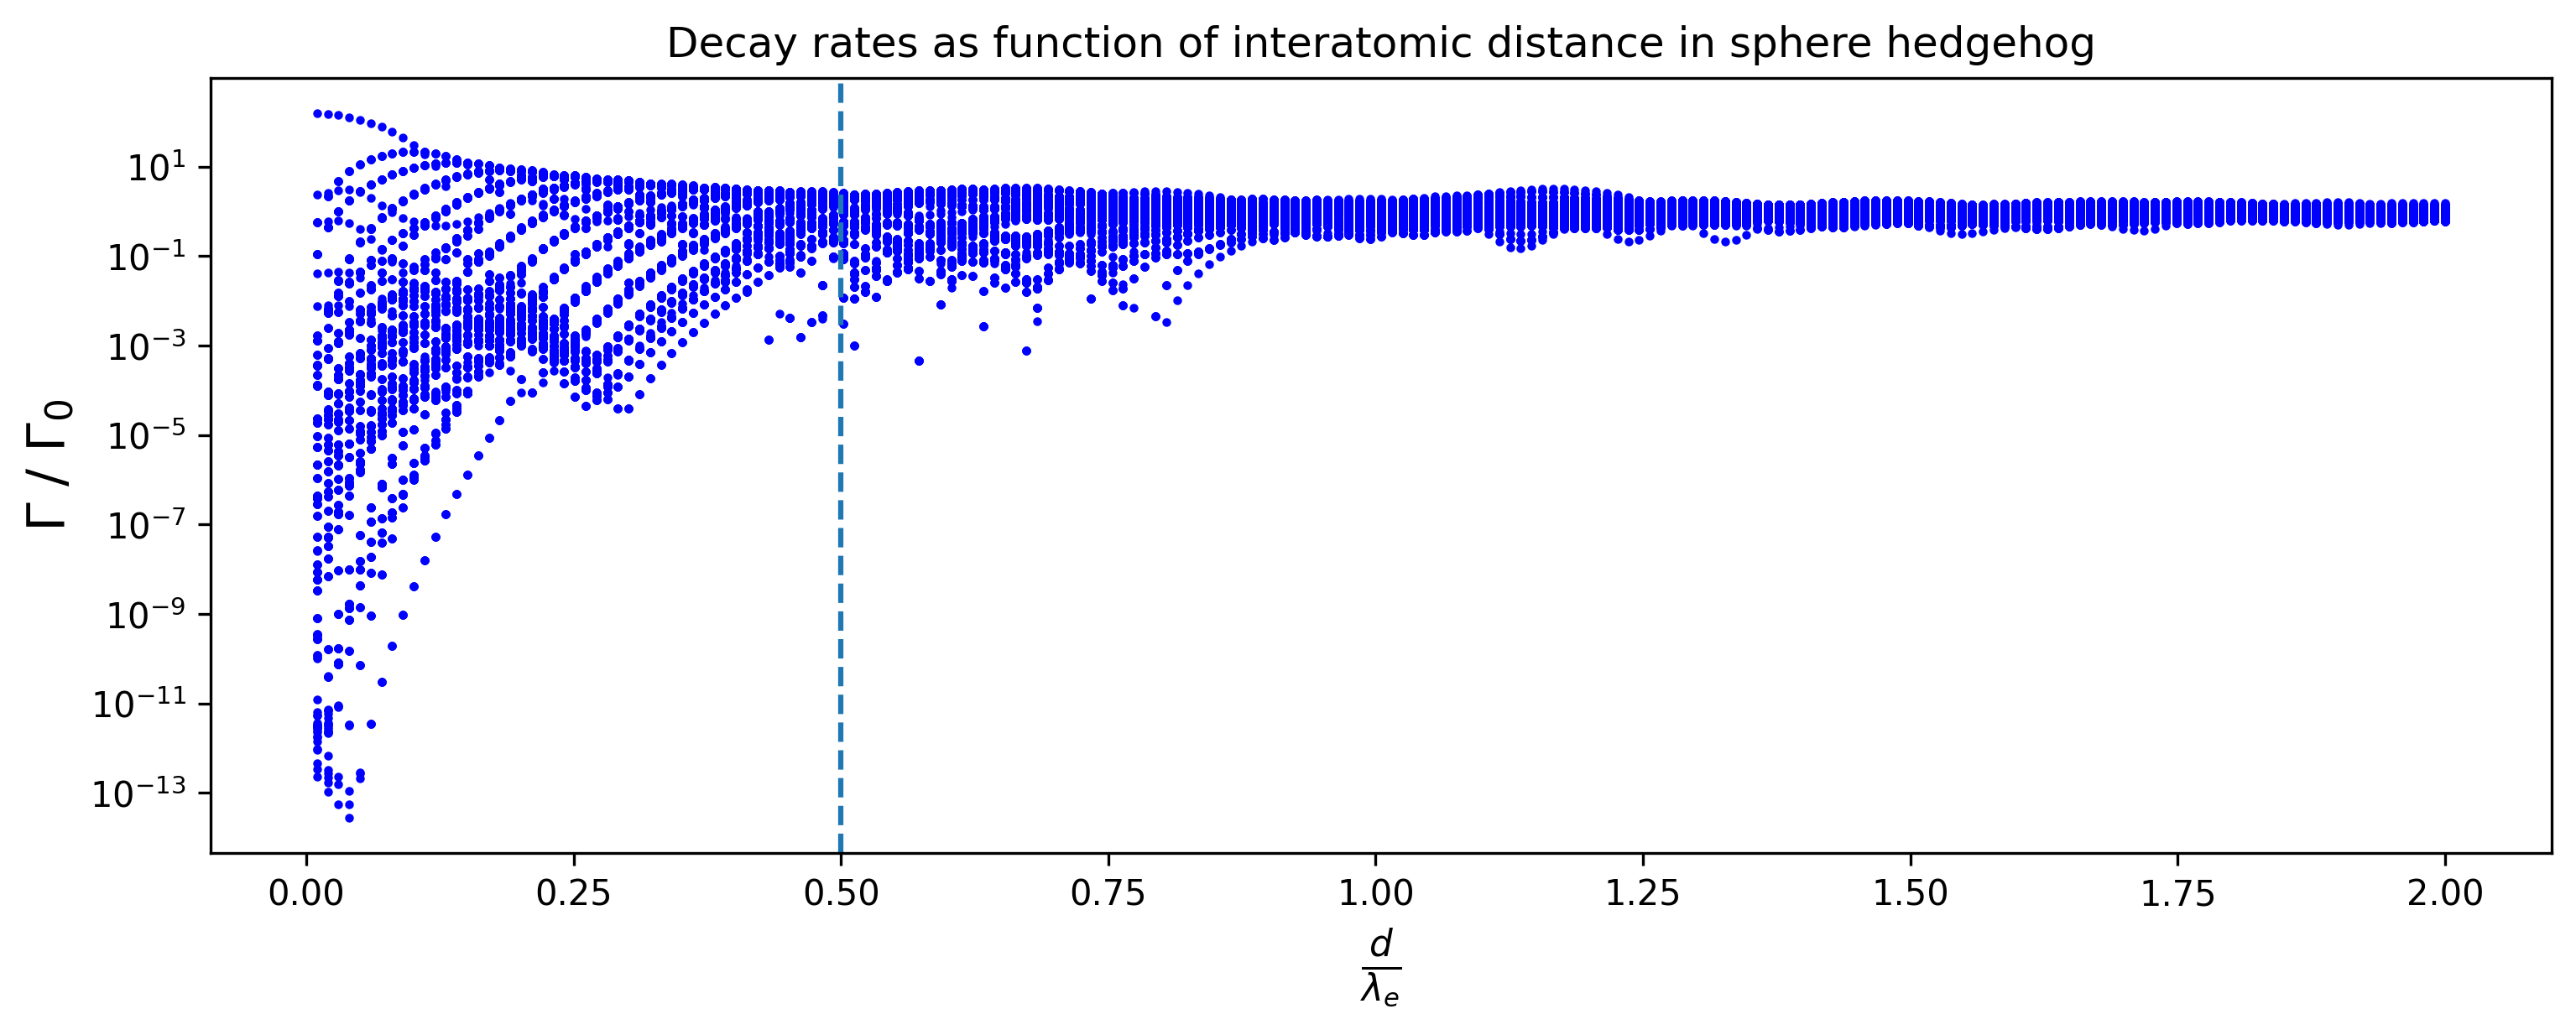

In [20]:
new_point = np.array([0, 0, 0])
new_point_polarization = np.array([0, 0, 1])

# Add it as a new row
sphere_points_withcenter = np.vstack((sphere_points, new_point))
unit_polarization_withcenter = np.vstack((unit_polarization, new_point_polarization))



decay_rate_list_hedge = []
most_subradiant_list_hedge = []
distances_hedge = np.linspace(0, 2, 200) #ik gang med pi, da det gøre i funktionen Qchains.FindEigenstates

for d in distances_hedge[1:]:
    eigvals_sphere162_hedge , eigvec_sphere162_hedge = Qchains.EigenstatesHedgehog(sphere_points_withcenter, unit_polarization_withcenter, d)
    decay_rate_hedge = 2 * eigvals_sphere162_hedge.real
    decay_rate_list_hedge.append(decay_rate_hedge)

    subradiant_hedge = -np.max(2 * eigvals_sphere162_hedge.real)
    most_subradiant_list_hedge.append(subradiant_hedge)
    

decay_rate_list_hedge_reversed = [-p for p in decay_rate_list_hedge]
plt.figure(figsize=(12,4), dpi=300)
plt.plot(distances_hedge[1:], decay_rate_list_hedge_reversed, '.', c = 'blue', markersize=3);
plt.xlabel(r'$\frac{d}{\lambda_e}$', size = 15)
plt.ylabel(r'$\Gamma$ / $\Gamma_0$', size = 15)
plt.axvline(x = 1/2, ymin = 0, ymax=3, linestyle = '--')
plt.title('Decay rates as function of interatomic distance in sphere hedgehog')
plt.yscale('log')